In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

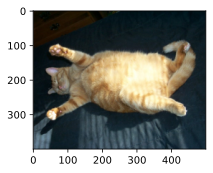

In [7]:
d2l.set_figsize()
img = d2l.Image.open('cat1.jpg')
d2l.plt.imshow(img);

In [9]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)] # aug 增广函数
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

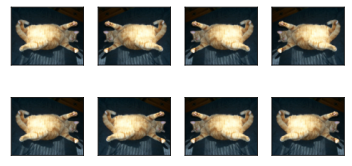

In [ ]:
apply(img, torchvision.transforms.RandomHorizontalFlip()) # 水平方向随机翻转
# 左右翻转图像通常不会改变对象的类别。这是最早且最广泛使用的图像增广方法之一。 接下来，我们使用transforms模块来创建RandomFlipLeftRight实例，这样就各有50%的几率使图像向左或向右翻转。

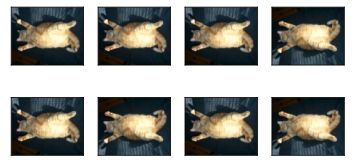

In [11]:
#上下翻转图像不如左右图像翻转那样常用。但是，至少对于这个示例图像，上下翻转不会妨碍识别。接下来，我们创建一个RandomFlipTopBottom实例，使图像各有50%的几率向上或向下翻转。
apply(img, torchvision.transforms.RandomVerticalFlip())


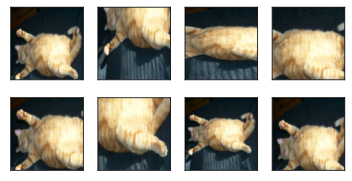

In [12]:
#下面的代码将随机裁剪一个面积为原始面积10%到100%的区域，该区域的宽高比从0.5～2之间随机取值。 然后，区域的宽度和高度都被缩放到200像素。 在本节中（除非另有说明），
#和之间的随机数指的是在区间中通过均匀采样获得的连续值。
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

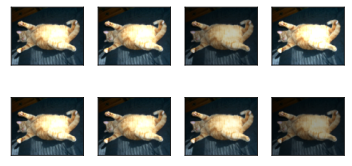

In [13]:
#另一种增广方法是改变颜色。 我们可以改变图像颜色的四个方面：亮度、对比度、饱和度和色调。 在下面的示例中，我们随机更改图像的亮度，随机值为原始图像的50%（）到150%（）之间。

apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

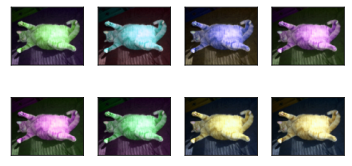

In [14]:
#同样，我们可以随机更改图像的色调
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

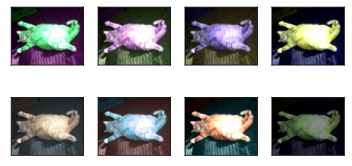

In [16]:
# 我们还可以创建一个RandomColorJitter实例，并设置如何同时随机更改图像的亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）。
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)


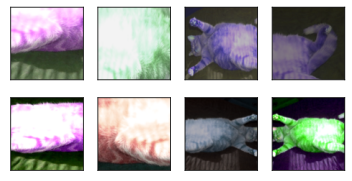

In [17]:
# 综合方法
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)